# Лабораторная работа №3

ФИО: Буянов Данил Романович  
Группа: БИВТ-23-УП-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Настройки отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Загрузка данных
data = pd.read_csv('../data/student-por.csv')
print(f"Размер датасета: {data.shape}")
print(f"Колонки: {list(data.columns)}")
print(f"Первые 5 строк:")
print(data.head())

Размер датасета: (649, 33)
Колонки: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Первые 5 строк:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course

## 2. Понимаем, какая перед нами задача

In [4]:
print("=== ТИП ЗАДАЧИ ===")
print(f"Целевая переменная: G3")
print(f"Минимальная оценка: {data['G3'].min()}")
print(f"Максимальная оценка: {data['G3'].max()}")
print(f"Уникальных оценок: {data['G3'].nunique()}")

print("\n=== ВЫВОД ===")
print("Задача: РЕГРЕССИЯ (предсказание оценки от 0 до 20)")

=== ТИП ЗАДАЧИ ===
Целевая переменная: G3
Минимальная оценка: 0
Максимальная оценка: 19
Уникальных оценок: 17

=== ВЫВОД ===
Задача: РЕГРЕССИЯ (предсказание оценки от 0 до 20)


## 3. Делаем предобработку данных

In [7]:
# Разделяем данные
X = data.drop('G3', axis=1)
y = data['G3']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train размер: {X_train.shape}")
print(f"Test размер: {X_test.shape}")
print(f"\nПример y_train: {y_train[:5].values}")

# Определяем типы признаков
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Числовые признаки ({len(numeric_features)}):")
print(numeric_features)
print(f"\nКатегориальные признаки ({len(categorical_features)}):")
print(categorical_features)

# Создаем трансформеры
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Объединяем
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применяем трансформацию
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"\nПосле обработки:")
print(f"X_train: {X_train_processed.shape}")
print(f"X_test: {X_test_processed.shape}")

Train размер: (519, 32)
Test размер: (130, 32)

Пример y_train: [18 12 12 13 10]
Числовые признаки (15):
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

Категориальные признаки (17):
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

После обработки:
X_train: (519, 58)
X_test: (130, 58)


## Обучение моделей

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree (depth=5)': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Decision Tree (depth=10)': DecisionTreeRegressor(max_depth=10, random_state=42),
    'KNN (k=3)': KNeighborsRegressor(n_neighbors=3),
    'KNN (k=5)': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

print("МЕТРИКИ")
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test_processed)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    
    print(f"\n{name}:")
    print(f"Train: MAE={train_mae:.3f}, RMSE={train_rmse:.3f}, MAPE={train_mape:.3f}")
    print(f"Test:  MAE={test_mae:.3f}, RMSE={test_rmse:.3f}, MAPE={test_mape:.3f}")

=== МЕТРИКИ ===

Linear Regression:
Train: MAE=0.795, RMSE=1.221, MAPE=413925650374839.375
Test:  MAE=0.765, RMSE=1.215, MAPE=347306267843126.688

Decision Tree (depth=5):
Train: MAE=0.707, RMSE=1.049, MAPE=208258942306150.125
Test:  MAE=0.793, RMSE=1.330, MAPE=361017298064517.500

Decision Tree (depth=10):
Train: MAE=0.121, RMSE=0.251, MAPE=0.010
Test:  MAE=0.993, RMSE=1.998, MAPE=375299968947541.438

KNN (k=3):
Train: MAE=0.978, RMSE=1.405, MAPE=520647355765375.250
Test:  MAE=1.241, RMSE=1.701, MAPE=392621505975889.438

KNN (k=5):
Train: MAE=1.127, RMSE=1.664, MAPE=718493350956218.000
Test:  MAE=1.215, RMSE=1.679, MAPE=374145199812318.188

Random Forest:
Train: MAE=0.308, RMSE=0.492, MAPE=144566415784185.906
Test:  MAE=0.754, RMSE=1.252, MAPE=398395351652005.438


## Сравнение моделей

In [15]:
# Создаем таблицу результатов
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train_MAE': [results[m]['train_mae'] for m in results],
    'Test_MAE': [results[m]['test_mae'] for m in results],
    'Train_RMSE': [results[m]['train_rmse'] for m in results],
    'Test_RMSE': [results[m]['test_rmse'] for m in results]
})

print("\n=== СРАВНЕНИЕ МОДЕЛЕЙ ===")
print(results_df.to_string(index=False))

# Находим лучшую модель по Test RMSE
best_idx = results_df['Test_RMSE'].idxmin()
best_model_name = results_df.loc[best_idx, 'Model']
print(f"\n✓ ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"  Test RMSE: {results_df.loc[best_idx, 'Test_RMSE']:.3f}")
print(f"  Test MAE: {results_df.loc[best_idx, 'Test_MAE']:.3f}")


=== СРАВНЕНИЕ МОДЕЛЕЙ ===
                   Model  Train_MAE  Test_MAE  Train_RMSE  Test_RMSE
       Linear Regression   0.795178  0.765060    1.221118   1.214870
 Decision Tree (depth=5)   0.707252  0.793438    1.049491   1.329726
Decision Tree (depth=10)   0.120671  0.992842    0.251447   1.997825
Decision Tree (no limit)   0.000000  0.838462    0.000000   1.657152
               KNN (k=3)   0.978163  1.241026    1.404720   1.700679
               KNN (k=5)   1.127168  1.215385    1.663596   1.678644
              KNN (k=10)   1.209441  1.226923    1.785820   1.702193
           Random Forest   0.308497  0.754000    0.492302   1.251884

✓ ЛУЧШАЯ МОДЕЛЬ: Linear Regression
  Test RMSE: 1.215
  Test MAE: 0.765


## Визуализация результатов


=== 7. ВИЗУАЛИЗАЦИЯ ===


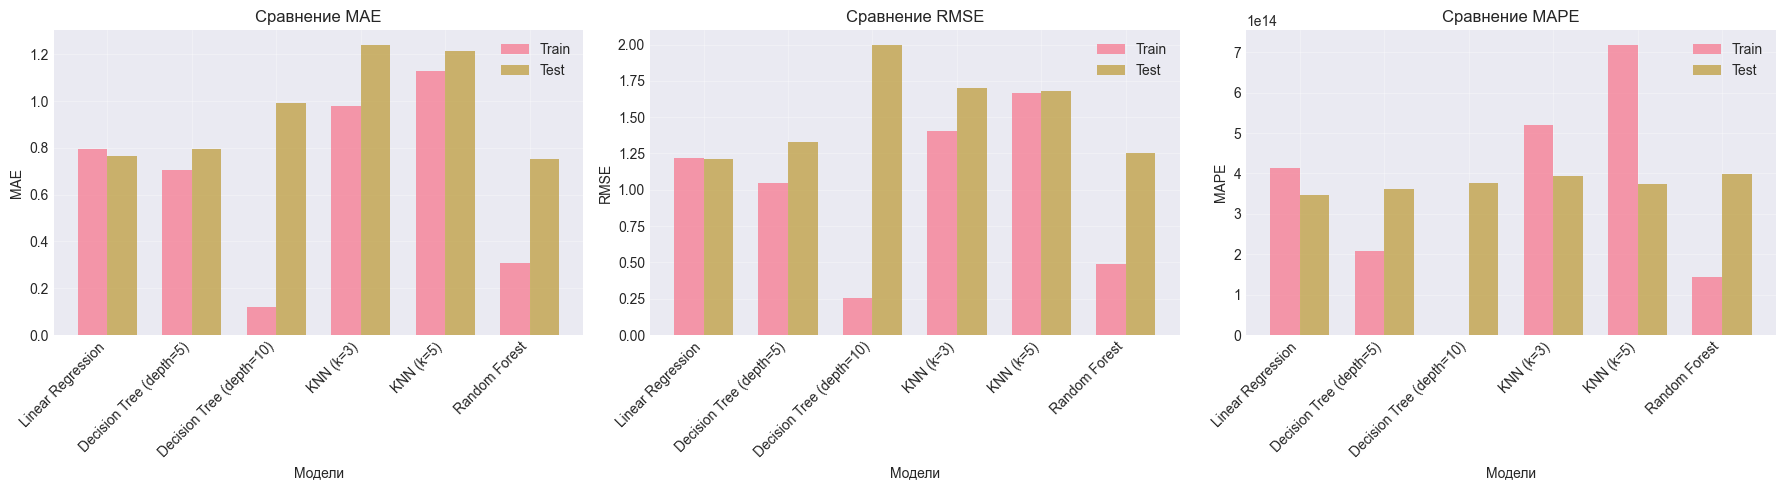


Лучшая модель: Linear Regression
Test RMSE: 1.215


In [ ]:
print("ВИЗУАЛИЗАЦИЯ")

# таблица результатов
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train_MAE': [mean_absolute_error(y_train, models[name].predict(X_train_processed)) for name in models],
    'Test_MAE': [mean_absolute_error(y_test, models[name].predict(X_test_processed)) for name in models],
    'Train_RMSE': [np.sqrt(mean_squared_error(y_train, models[name].predict(X_train_processed))) for name in models],
    'Test_RMSE': [np.sqrt(mean_squared_error(y_test, models[name].predict(X_test_processed))) for name in models],
    'Train_MAPE': [mean_absolute_percentage_error(y_train, models[name].predict(X_train_processed)) for name in models],
    'Test_MAPE': [mean_absolute_percentage_error(y_test, models[name].predict(X_test_processed)) for name in models]
})

# Графики всех метрик
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
x_pos = range(len(results_df))
width = 0.35

# 1. MAE
axes[0].bar([p - width/2 for p in x_pos], results_df['Train_MAE'], width, label='Train', alpha=0.7)
axes[0].bar([p + width/2 for p in x_pos], results_df['Test_MAE'], width, label='Test', alpha=0.7)
axes[0].set_xlabel('Модели')
axes[0].set_ylabel('MAE')
axes[0].set_title('Сравнение MAE')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. RMSE
axes[1].bar([p - width/2 for p in x_pos], results_df['Train_RMSE'], width, label='Train', alpha=0.7)
axes[1].bar([p + width/2 for p in x_pos], results_df['Test_RMSE'], width, label='Test', alpha=0.7)
axes[1].set_xlabel('Модели')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Сравнение RMSE')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. MAPE
axes[2].bar([p - width/2 for p in x_pos], results_df['Train_MAPE'], width, label='Train', alpha=0.7)
axes[2].bar([p + width/2 for p in x_pos], results_df['Test_MAPE'], width, label='Test', alpha=0.7)
axes[2].set_xlabel('Модели')
axes[2].set_ylabel('MAPE')
axes[2].set_title('Сравнение MAPE')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод лучшей модели
best_idx = results_df['Test_RMSE'].idxmin()
print(f"\nЛучшая модель: {results_df.loc[best_idx, 'Model']}")
print(f"Test RMSE: {results_df.loc[best_idx, 'Test_RMSE']:.3f}")

## Анализ переобучения


=== АНАЛИЗ ПЕРЕОБУЧЕНИЯ ===
(Положительная разница = переобучение)
                   Model  MAE_diff  RMSE_diff
       Linear Regression -0.030118  -0.006248
 Decision Tree (depth=5)  0.086186   0.280235
Decision Tree (depth=10)  0.872171   1.746378
Decision Tree (no limit)  0.838462   1.657152
               KNN (k=3)  0.262863   0.295958
               KNN (k=5)  0.088217   0.015048
              KNN (k=10)  0.017482  -0.083627
           Random Forest  0.445503   0.759582


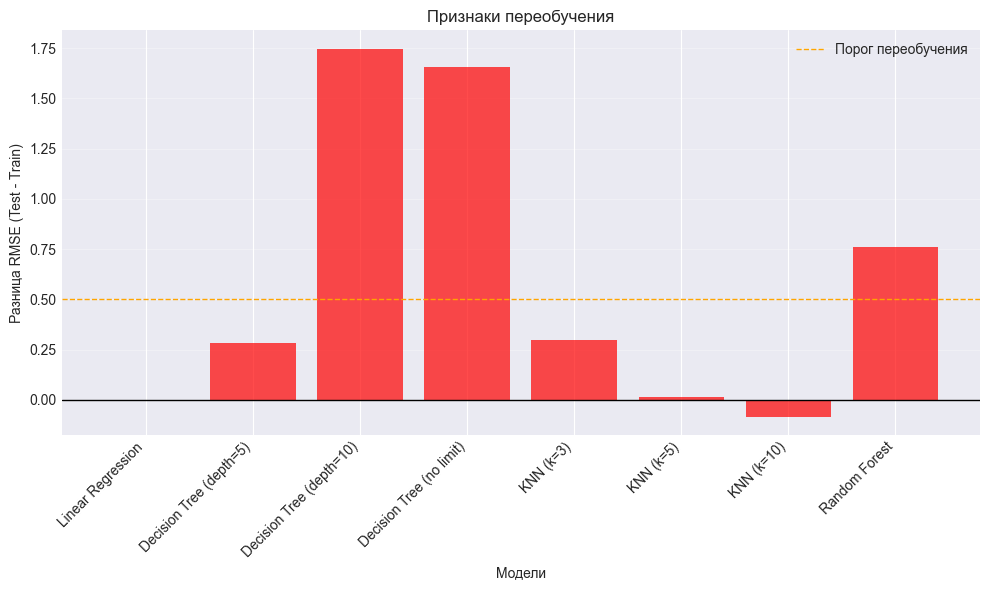

In [12]:
# Расчет разницы между train и test
results_df['MAE_diff'] = results_df['Test_MAE'] - results_df['Train_MAE']
results_df['RMSE_diff'] = results_df['Test_RMSE'] - results_df['Train_RMSE']

print("\n=== АНАЛИЗ ПЕРЕОБУЧЕНИЯ ===")
print("(Положительная разница = переобучение)")
print(results_df[['Model', 'MAE_diff', 'RMSE_diff']].to_string(index=False))

# График разницы
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE_diff'], alpha=0.7, color='red')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axhline(y=0.5, color='orange', linestyle='--', linewidth=1, label='Порог переобучения')
plt.xlabel('Модели')
plt.ylabel('Разница RMSE (Test - Train)')
plt.title('Признаки переобучения')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## Визуализация предсказаний лучшей модели

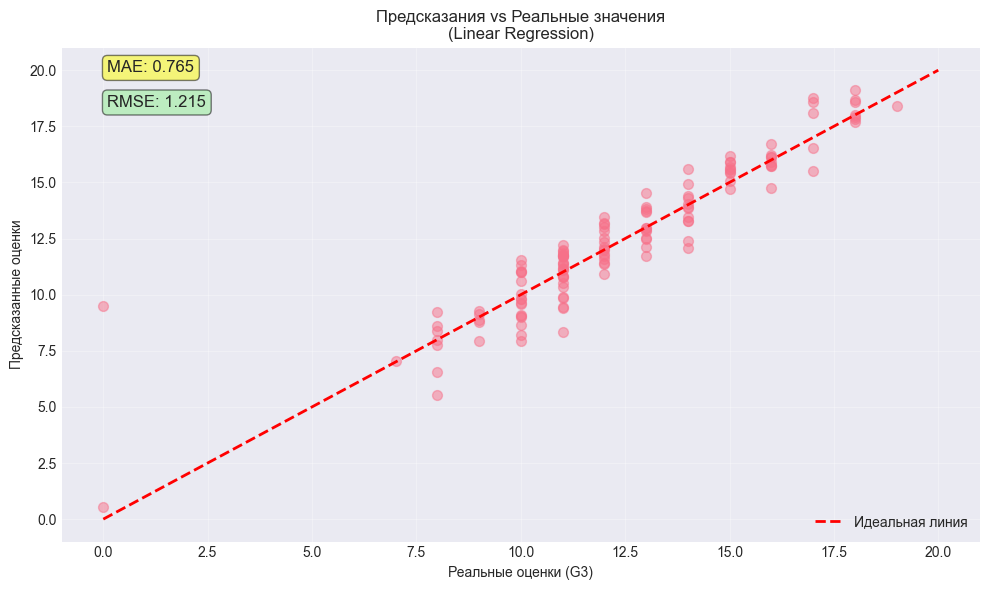

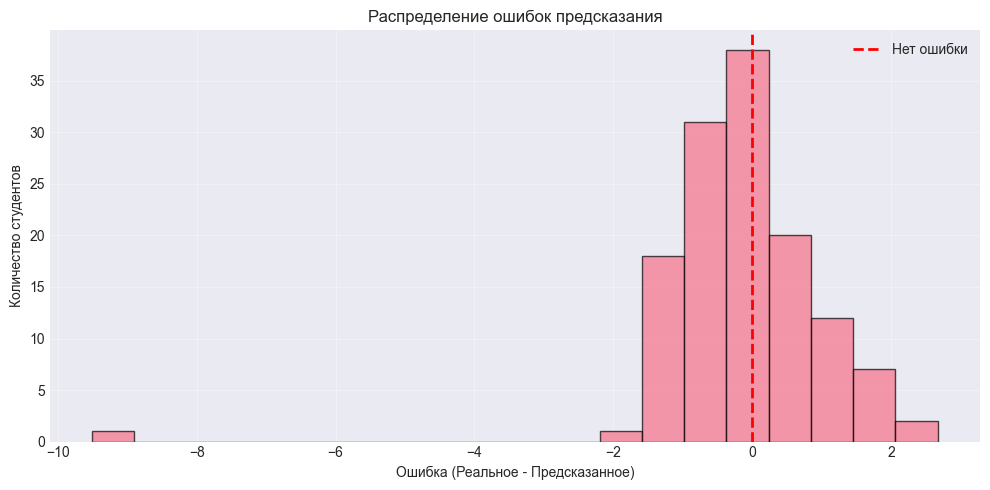

In [13]:
# Используем лучшую модель
best_model = results[best_model_name]['model']
y_test_pred_best = best_model.predict(X_test_processed)

# График предсказаний vs реальные значения
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_best, alpha=0.5, s=50)
plt.plot([0, 20], [0, 20], 'r--', label='Идеальная линия', linewidth=2)
plt.xlabel('Реальные оценки (G3)')
plt.ylabel('Предсказанные оценки')
plt.title(f'Предсказания vs Реальные значения\n({best_model_name})')
plt.legend()

# Добавляем метрики
plt.text(0.05, 0.95, f'MAE: {results_df.loc[best_idx, "Test_MAE"]:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))
plt.text(0.05, 0.88, f'RMSE: {results_df.loc[best_idx, "Test_RMSE"]:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Распределение ошибок
errors = y_test - y_test_pred_best
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel('Ошибка (Реальное - Предсказанное)')
plt.ylabel('Количество студентов')
plt.title('Распределение ошибок предсказания')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()